In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

# Налаштування стилю
plt.style.use('seaborn-v0_8-darkgrid')
def plot_activation_functions():
    """
    Демонстрація основних функцій активації
    Використовувати на початку лекції при поясненні
    """
    x = np.linspace(-4, 4, 200)

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Step function
    ax = axes[0, 0]
    y_step = (x >= 0).astype(float)
    ax.plot(x, y_step, 'b-', linewidth=3)
    ax.set_title('Step Function', fontsize=14, fontweight='bold')
    ax.set_ylim([-0.5, 1.5])
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('z')
    ax.set_ylabel('f(z)')

    # Sigmoid
    ax = axes[0, 1]
    y_sigmoid = 1 / (1 + np.exp(-x))
    ax.plot(x, y_sigmoid, 'r-', linewidth=3)
    ax.set_title('Sigmoid: f(z) = 1/(1+e^(-z))', fontsize=14, fontweight='bold')
    ax.set_ylim([-0.5, 1.5])
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axhline(y=1, color='k', linestyle='--', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('z')
    ax.set_ylabel('σ(z)')

    # Tanh
    ax = axes[0, 2]
    y_tanh = np.tanh(x)
    ax.plot(x, y_tanh, 'g-', linewidth=3)
    ax.set_title('Tanh: f(z) = (e^z - e^(-z))/(e^z + e^(-z))', fontsize=14, fontweight='bold')
    ax.set_ylim([-1.5, 1.5])
    ax.axhline(y=-1, color='k', linestyle='--', alpha=0.3)
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axhline(y=1, color='k', linestyle='--', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('z')
    ax.set_ylabel('tanh(z)')

    # ReLU
    ax = axes[1, 0]
    y_relu = np.maximum(0, x)
    ax.plot(x, y_relu, 'orange', linewidth=3)
    ax.set_title('ReLU: f(z) = max(0, z)', fontsize=14, fontweight='bold')
    ax.set_ylim([-0.5, 4])
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('z')
    ax.set_ylabel('ReLU(z)')

    # Leaky ReLU
    ax = axes[1, 1]
    alpha = 0.1
    y_leaky = np.where(x > 0, x, alpha * x)
    ax.plot(x, y_leaky, 'purple', linewidth=3)
    ax.set_title(f'Leaky ReLU (α={alpha}): f(z) = max(αz, z)', fontsize=14, fontweight='bold')
    ax.set_ylim([-1, 4])
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('z')
    ax.set_ylabel('Leaky ReLU(z)')

    # Порівняння всіх
    ax = axes[1, 2]
    ax.plot(x, y_step, 'b-', label='Step', linewidth=2, alpha=0.7)
    ax.plot(x, y_sigmoid, 'r-', label='Sigmoid', linewidth=2, alpha=0.7)
    ax.plot(x, y_tanh, 'g-', label='Tanh', linewidth=2, alpha=0.7)
    ax.plot(x, y_relu/4, 'orange', label='ReLU/4', linewidth=2, alpha=0.7)
    ax.set_title('Порівняння функцій активації', fontsize=14, fontweight='bold')
    ax.set_ylim([-1.5, 1.5])
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('z')
    ax.set_ylabel('f(z)')

    plt.suptitle('Функції активації в нейронних мережах', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

def plot_gradient_problem():
    """
    Демонстрація проблеми зникаючого градієнта
    Показати після пояснення функцій активації
    """
    x = np.linspace(-4, 4, 200)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Sigmoid та її похідна
    sigmoid = 1 / (1 + np.exp(-x))
    sigmoid_grad = sigmoid * (1 - sigmoid)

    ax = axes[0]
    ax.plot(x, sigmoid, 'b-', label='Sigmoid', linewidth=3)
    ax.plot(x, sigmoid_grad, 'r--', label='Gradient', linewidth=3)
    ax.fill_between(x, 0, sigmoid_grad, alpha=0.3, color='red')
    ax.set_title('Sigmoid: максимальний градієнт = 0.25', fontsize=12, fontweight='bold')
    ax.set_xlabel('z')
    ax.set_ylabel('f(z)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.annotate(f'Max gradient = {sigmoid_grad.max():.3f}',
                xy=(0, 0.25), xytext=(1.5, 0.4),
                arrowprops=dict(arrowstyle='->', color='red'),
                fontsize=11, color='red')

    # Tanh та її похідна
    tanh = np.tanh(x)
    tanh_grad = 1 - tanh**2

    ax = axes[1]
    ax.plot(x, tanh, 'g-', label='Tanh', linewidth=3)
    ax.plot(x, tanh_grad, 'r--', label='Gradient', linewidth=3)
    ax.fill_between(x, 0, tanh_grad, alpha=0.3, color='red')
    ax.set_title('Tanh: максимальний градієнт = 1.0', fontsize=12, fontweight='bold')
    ax.set_xlabel('z')
    ax.set_ylabel('f(z)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.annotate(f'Max gradient = {tanh_grad.max():.1f}',
                xy=(0, 1), xytext=(1.5, 0.8),
                arrowprops=dict(arrowstyle='->', color='red'),
                fontsize=11, color='red')

    # ReLU та її похідна
    relu = np.maximum(0, x)
    relu_grad = (x > 0).astype(float)

    ax = axes[2]
    ax.plot(x, relu, 'orange', label='ReLU', linewidth=3)
    ax.plot(x, relu_grad * 2, 'r--', label='Gradient (×2)', linewidth=3)
    ax.set_title('ReLU: градієнт = 1 або 0', fontsize=12, fontweight='bold')
    ax.set_xlabel('z')
    ax.set_ylabel('f(z)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim([-0.5, 4])
    ax.annotate('Gradient = 1', xy=(2, 2), fontsize=11, color='green')
    ax.annotate('Gradient = 0\n"Dead neuron"', xy=(-3, 0.5), fontsize=11, color='red')

    plt.suptitle('Проблема зникаючого градієнта (Vanishing Gradient)',
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

def demonstrate_xor_problem():
    """
    Візуальна демонстрація чому персептрон не може вирішити XOR
    Ключовий момент лекції!
    """
    # Дані для логічних функцій
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # AND - лінійно розділювана
    ax = axes[0]
    y_and = np.array([0, 0, 0, 1])
    colors_and = ['red' if y == 0 else 'blue' for y in y_and]
    ax.scatter(X[:, 0], X[:, 1], c=colors_and, s=300, edgecolors='black', linewidth=2)

    # Лінія розділення для AND
    x_line = np.linspace(-0.5, 1.5, 100)
    y_line = -x_line + 1.5
    ax.plot(x_line, y_line, 'g--', linewidth=2, label='Decision boundary')

    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel('x₁', fontsize=12)
    ax.set_ylabel('x₂', fontsize=12)
    ax.set_title('AND - Лінійно розділювана ✓', fontsize=14, fontweight='bold', color='green')
    ax.grid(True, alpha=0.3)
    ax.legend()

    # Анотації для AND
    for i, (x, y) in enumerate(X):
        ax.annotate(f'{int(x)} AND {int(y)} = {y_and[i]}',
                   xy=(x, y), xytext=(5, 5),
                   textcoords='offset points', fontsize=9)

    # OR - лінійно розділювана
    ax = axes[1]
    y_or = np.array([0, 1, 1, 1])
    colors_or = ['red' if y == 0 else 'blue' for y in y_or]
    ax.scatter(X[:, 0], X[:, 1], c=colors_or, s=300, edgecolors='black', linewidth=2)

    # Лінія розділення для OR
    y_line = -x_line + 0.5
    ax.plot(x_line, y_line, 'g--', linewidth=2, label='Decision boundary')

    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel('x₁', fontsize=12)
    ax.set_ylabel('x₂', fontsize=12)
    ax.set_title('OR - Лінійно розділювана ✓', fontsize=14, fontweight='bold', color='green')
    ax.grid(True, alpha=0.3)
    ax.legend()

    # Анотації для OR
    for i, (x, y) in enumerate(X):
        ax.annotate(f'{int(x)} OR {int(y)} = {y_or[i]}',
                   xy=(x, y), xytext=(5, 5),
                   textcoords='offset points', fontsize=9)

    # XOR - НЕ лінійно розділювана
    ax = axes[2]
    y_xor = np.array([0, 1, 1, 0])
    colors_xor = ['red' if y == 0 else 'blue' for y in y_xor]
    ax.scatter(X[:, 0], X[:, 1], c=colors_xor, s=300, edgecolors='black', linewidth=2)

    # Спроби провести лінії (неможливо!)
    ax.plot([0.5, 0.5], [-0.5, 1.5], 'gray', linewidth=1, alpha=0.5)
    ax.plot([-0.5, 1.5], [0.5, 0.5], 'gray', linewidth=1, alpha=0.5)
    ax.text(0.5, 1.3, '?', fontsize=30, color='red', ha='center')

    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel('x₁', fontsize=12)
    ax.set_ylabel('x₂', fontsize=12)
    ax.set_title('XOR - НЕ лінійно розділювана ✗', fontsize=14, fontweight='bold', color='red')
    ax.grid(True, alpha=0.3)

    # Анотації для XOR
    for i, (x, y) in enumerate(X):
        ax.annotate(f'{int(x)} XOR {int(y)} = {y_xor[i]}',
                   xy=(x, y), xytext=(5, 5),
                   textcoords='offset points', fontsize=9)

    plt.suptitle('Проблема XOR: Чому потрібні багатошарові мережі?',
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

def animate_perceptron_learning():
    """
    Анімація процесу навчання персептрона на AND
    Показує як змінюється decision boundary
    """
    np.random.seed(42)

    # Дані AND
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 0, 0, 1])

    # Ініціалізація персептрона
    w = np.random.randn(2) * 0.5
    b = 0
    lr = 0.1

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Історія для графіка втрат
    losses = []

    def update(epoch):
        nonlocal w, b, losses

        # Очищення
        ax1.clear()
        ax2.clear()

        # Навчання
        predictions = []
        for xi, yi in zip(X, y):
            z = np.dot(w, xi) + b
            pred = 1 if z >= 0 else 0
            predictions.append(pred)

            error = yi - pred
            w += lr * error * xi
            b += lr * error

        # Обчислення втрат
        loss = np.mean((predictions - y) ** 2)
        losses.append(loss)

        # Візуалізація даних
        colors = ['red' if yi == 0 else 'blue' for yi in y]
        ax1.scatter(X[:, 0], X[:, 1], c=colors, s=300, edgecolors='black', linewidth=2)

        # Decision boundary
        if w[1] != 0:
            x_boundary = np.linspace(-0.5, 1.5, 100)
            y_boundary = -(w[0] * x_boundary + b) / w[1]
            ax1.plot(x_boundary, y_boundary, 'g--', linewidth=2)

        ax1.set_xlim(-0.5, 1.5)
        ax1.set_ylim(-0.5, 1.5)
        ax1.set_xlabel('x₁')
        ax1.set_ylabel('x₂')
        ax1.set_title(f'Епоха {epoch}: w=[{w[0]:.2f}, {w[1]:.2f}], b={b:.2f}')
        ax1.grid(True, alpha=0.3)

        # Графік втрат
        ax2.plot(losses, 'b-', linewidth=2)
        ax2.set_xlabel('Епоха')
        ax2.set_ylabel('MSE Loss')
        ax2.set_title('Процес навчання')
        ax2.grid(True, alpha=0.3)

    # Створення анімації
    anim = FuncAnimation(fig, update, frames=20, interval=500, repeat=True)
    plt.suptitle('Анімація навчання персептрона на AND', fontsize=14, fontweight='bold')

    return anim

def visualize_mlp_solution():
    """
    Показує як MLP вирішує XOR через нелінійне перетворення простору
    """
    # Проста MLP для XOR (попередньо навчена)
    np.random.seed(42)

    # Ваги навченої мережі (приблизні)
    W1 = np.array([[5, -5], [-5, 5]])  # 2x2
    b1 = np.array([-2.5, -2.5])
    W2 = np.array([[6], [6]])  # 2x1
    b2 = np.array([-5])

    def mlp_forward(x):
        z1 = x @ W1.T + b1
        a1 = 1 / (1 + np.exp(-z1))  # sigmoid
        z2 = a1 @ W2 + b2
        a2 = 1 / (1 + np.exp(-z2))  # sigmoid
        return a2, a1

    fig = plt.figure(figsize=(15, 5))

    # 1. Вхідний простір
    ax1 = fig.add_subplot(131)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 1, 1, 0])
    colors = ['red' if yi == 0 else 'blue' for yi in y]
    ax1.scatter(X[:, 0], X[:, 1], c=colors, s=300, edgecolors='black', linewidth=2)
    ax1.set_title('Вхідний простір (x₁, x₂)', fontsize=12, fontweight='bold')
    ax1.set_xlabel('x₁')
    ax1.set_ylabel('x₂')
    ax1.set_xlim(-0.5, 1.5)
    ax1.set_ylim(-0.5, 1.5)
    ax1.grid(True, alpha=0.3)

    # 2. Прихований простір
    ax2 = fig.add_subplot(132)
    hidden_features = []
    for xi in X:
        _, h = mlp_forward(xi)
        hidden_features.append(h)
    hidden_features = np.array(hidden_features)

    ax2.scatter(hidden_features[:, 0], hidden_features[:, 1],
               c=colors, s=300, edgecolors='black', linewidth=2)

    # Лінія розділення в прихованому просторі
    h_line = np.linspace(0, 1, 100)
    ax2.plot(h_line, 1 - h_line, 'g--', linewidth=2, label='Linear boundary')

    ax2.set_title('Прихований простір (h₁, h₂)', fontsize=12, fontweight='bold')
    ax2.set_xlabel('h₁ (нейрон 1)')
    ax2.set_ylabel('h₂ (нейрон 2)')
    ax2.set_xlim(-0.1, 1.1)
    ax2.set_ylim(-0.1, 1.1)
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    # 3. Decision boundary у вхідному просторі
    ax3 = fig.add_subplot(133)

    # Створюємо сітку
    h = 0.01
    xx, yy = np.meshgrid(np.arange(-0.5, 1.5, h), np.arange(-0.5, 1.5, h))
    Z = np.zeros(xx.shape)

    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            Z[i, j], _ = mlp_forward(np.array([xx[i, j], yy[i, j]]))

    # Contour plot
    ax3.contourf(xx, yy, Z, levels=20, cmap='RdBu', alpha=0.6)
    contour = ax3.contour(xx, yy, Z, levels=[0.5], colors='green', linewidths=2)

    ax3.scatter(X[:, 0], X[:, 1], c=colors, s=300, edgecolors='black', linewidth=2)
    ax3.set_title('Нелінійна decision boundary', fontsize=12, fontweight='bold')
    ax3.set_xlabel('x₁')
    ax3.set_ylabel('x₂')
    ax3.set_xlim(-0.5, 1.5)
    ax3.set_ylim(-0.5, 1.5)
    ax3.grid(True, alpha=0.3)

    plt.suptitle('Як MLP вирішує XOR: Трансформація простору ознак',
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

def visualize_gradient_descent():
    """
    Візуалізація градієнтного спуску на простій функції
    """
    # Проста квадратична функція
    def f(x):
        return (x - 2)**2 + 1

    def df(x):
        return 2 * (x - 2)

    x = np.linspace(-2, 6, 200)
    y = f(x)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Траєкторія градієнтного спуску
    x_start = 5.5
    lr = 0.1
    trajectory = [x_start]

    for _ in range(20):
        grad = df(trajectory[-1])
        x_new = trajectory[-1] - lr * grad
        trajectory.append(x_new)

    # Графік функції та траєкторія
    ax1.plot(x, y, 'b-', linewidth=2, label='f(x) = (x-2)² + 1')
    ax1.plot(trajectory, [f(xi) for xi in trajectory], 'ro-',
            markersize=8, linewidth=1, alpha=0.7, label='Градієнтний спуск')

    # Анотації
    ax1.annotate('Старт', xy=(trajectory[0], f(trajectory[0])),
                xytext=(trajectory[0]+0.5, f(trajectory[0])+2),
                arrowprops=dict(arrowstyle='->', color='red'),
                fontsize=11)
    ax1.annotate('Мінімум', xy=(2, 1), xytext=(2, -1),
                arrowprops=dict(arrowstyle='->', color='green'),
                fontsize=11)

    ax1.set_xlabel('x (параметр)')
    ax1.set_ylabel('f(x) (функція втрат)')
    ax1.set_title('Градієнтний спуск: x = x - η·∇f', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Вплив learning rate
    ax2.set_title('Вплив learning rate (η)', fontsize=12, fontweight='bold')

    learning_rates = [0.01, 0.1, 0.5, 0.9]
    colors = ['blue', 'green', 'orange', 'red']

    for lr, color in zip(learning_rates, colors):
        x_current = 5.5
        trajectory_lr = [x_current]

        for _ in range(30):
            grad = df(x_current)
            x_current = x_current - lr * grad
            trajectory_lr.append(x_current)

        losses = [f(xi) for xi in trajectory_lr]
        ax2.plot(losses, color=color, linewidth=2, label=f'η = {lr}')

    ax2.set_xlabel('Ітерація')
    ax2.set_ylabel('Функція втрат')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_yscale('log')

    plt.suptitle('Візуалізація градієнтного спуску', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


## 1. Модель нейрона

### Лінійна комбінація (pre-activation)
$$z = \sum_{i=1}^{n} w_i x_i + b = \mathbf{w}^T \mathbf{x} + b$$

### Вихід нейрона
$$y = f(z) = f(\mathbf{w}^T \mathbf{x} + b)$$

де:
- $\mathbf{x} = [x_1, x_2, ..., x_n]$ - вектор входів
- $\mathbf{w} = [w_1, w_2, ..., w_n]$ - вектор ваг
- $b$ - зміщення (bias)
- $f$ - функція активації

## 2. Функції активації

### Step Function (Крокова)
$$f(z) = \begin{cases}
1, & z \geq 0 \\
0, & z < 0
\end{cases}$$

### Sigmoid (Логістична)
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

**Похідна:**
$$\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))$$

### Tanh (Гіперболічний тангенс)
$$\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}} = \frac{2}{1 + e^{-2z}} - 1$$

**Похідна:**
$$\tanh'(z) = 1 - \tanh^2(z)$$

### ReLU (Rectified Linear Unit)
$$\text{ReLU}(z) = \max(0, z) = \begin{cases}
z, & z > 0 \\
0, & z \leq 0
\end{cases}$$

**Похідна:**
$$\text{ReLU}'(z) = \begin{cases}
1, & z > 0 \\
0, & z \leq 0
\end{cases}$$

### Leaky ReLU
$$\text{LeakyReLU}(z) = \begin{cases}
z, & z > 0 \\
\alpha z, & z \leq 0
\end{cases}$$

де $\alpha$ - малий позитивний параметр (зазвичай 0.01)

### Swish
$$\text{Swish}(z) = z \cdot \sigma(z) = \frac{z}{1 + e^{-z}}$$

---

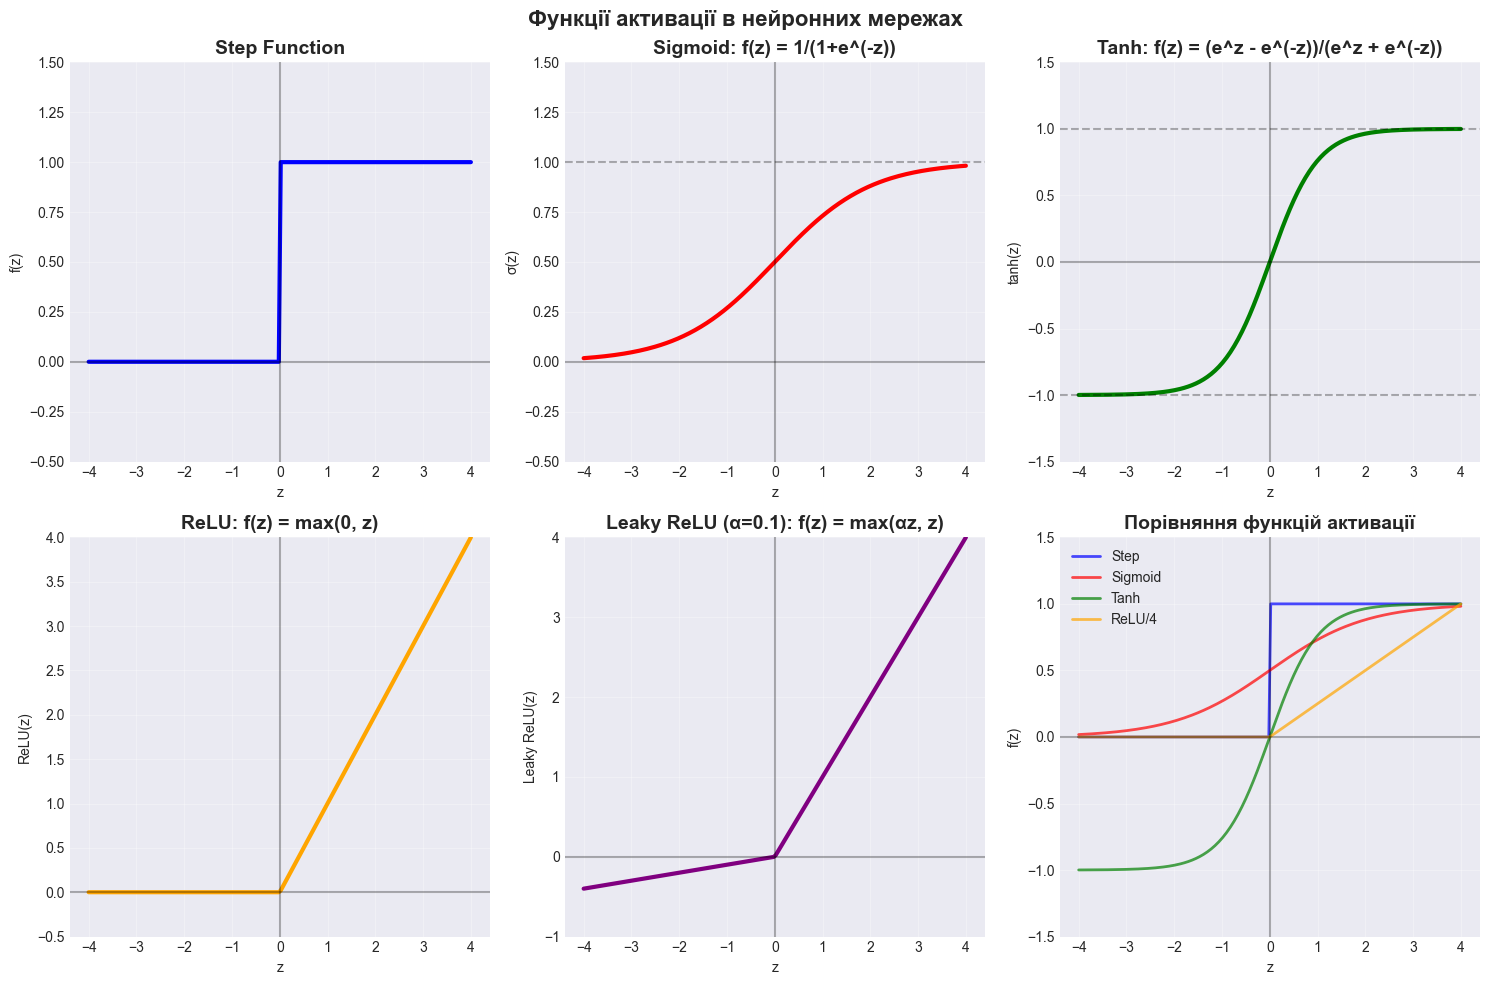

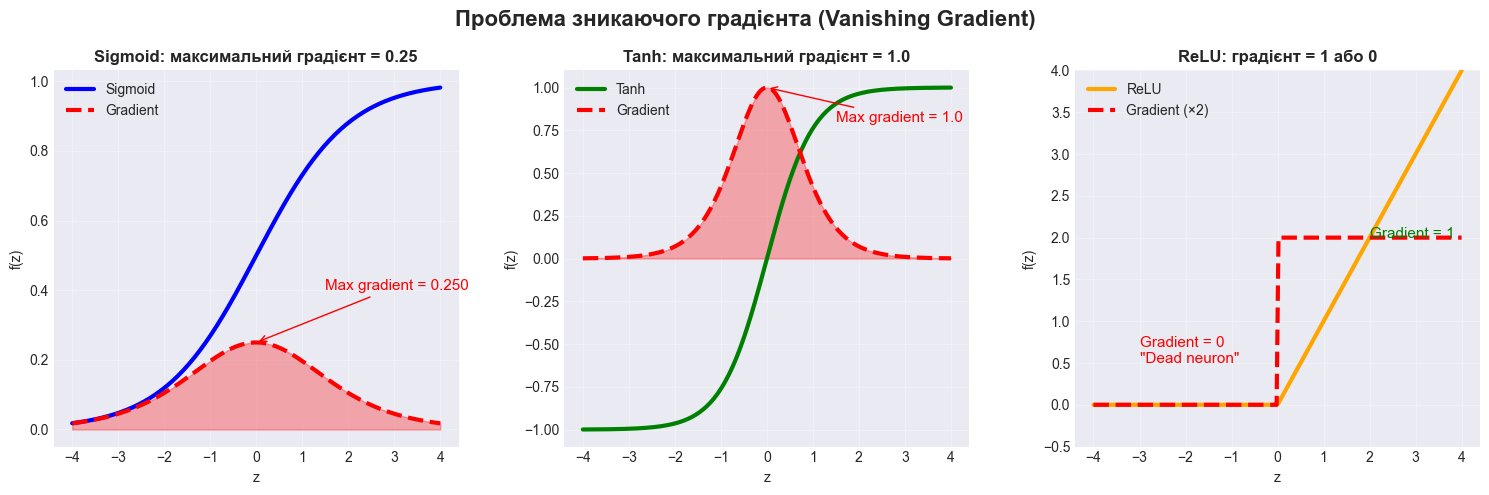

In [7]:
plot_activation_functions()
plot_gradient_problem()

## 3. Навчання персептрона

### Правило оновлення персептрона (Rosenblatt)
$$\mathbf{w}_{new} = \mathbf{w}_{old} + \eta \cdot e \cdot \mathbf{x}$$
$$b_{new} = b_{old} + \eta \cdot e$$

де:
- $\eta$ - швидкість навчання (learning rate)
- $e = y_{true} - y_{pred}$ - помилка передбачення

---

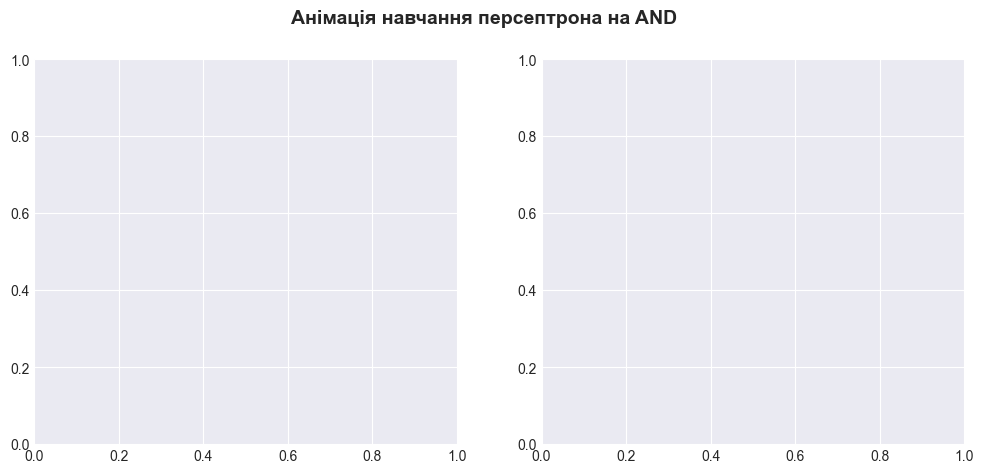

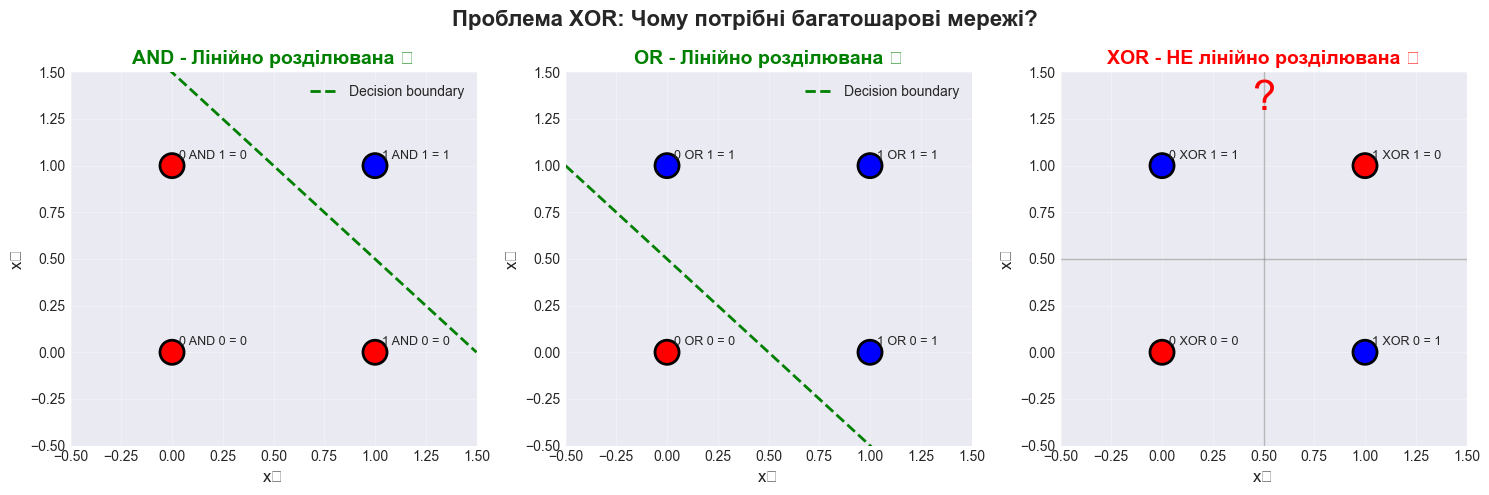

In [41]:
anim = animate_perceptron_learning()
demonstrate_xor_problem()
anim.save('perceptron_learning.gif', writer='pillow', fps=2)

# Потім відобразити GIF
#from IPython.display import Image
#Image('perceptron_learning.gif')

## 4. Багатошарова мережа (MLP)

### Forward Pass

Для L-шарової мережі:

**Шар 1 (вхідний → прихований):**
$$\mathbf{z}^{(1)} = \mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}^{(1)}$$
$$\mathbf{a}^{(1)} = f^{(1)}(\mathbf{z}^{(1)})$$

**Шар l (прихований → прихований):**
$$\mathbf{z}^{(l)} = \mathbf{W}^{(l)} \mathbf{a}^{(l-1)} + \mathbf{b}^{(l)}$$
$$\mathbf{a}^{(l)} = f^{(l)}(\mathbf{z}^{(l)})$$

**Шар L (прихований → вихідний):**
$$\mathbf{z}^{(L)} = \mathbf{W}^{(L)} \mathbf{a}^{(L-1)} + \mathbf{b}^{(L)}$$
$$\mathbf{y} = \mathbf{a}^{(L)} = f^{(L)}(\mathbf{z}^{(L)})$$

---

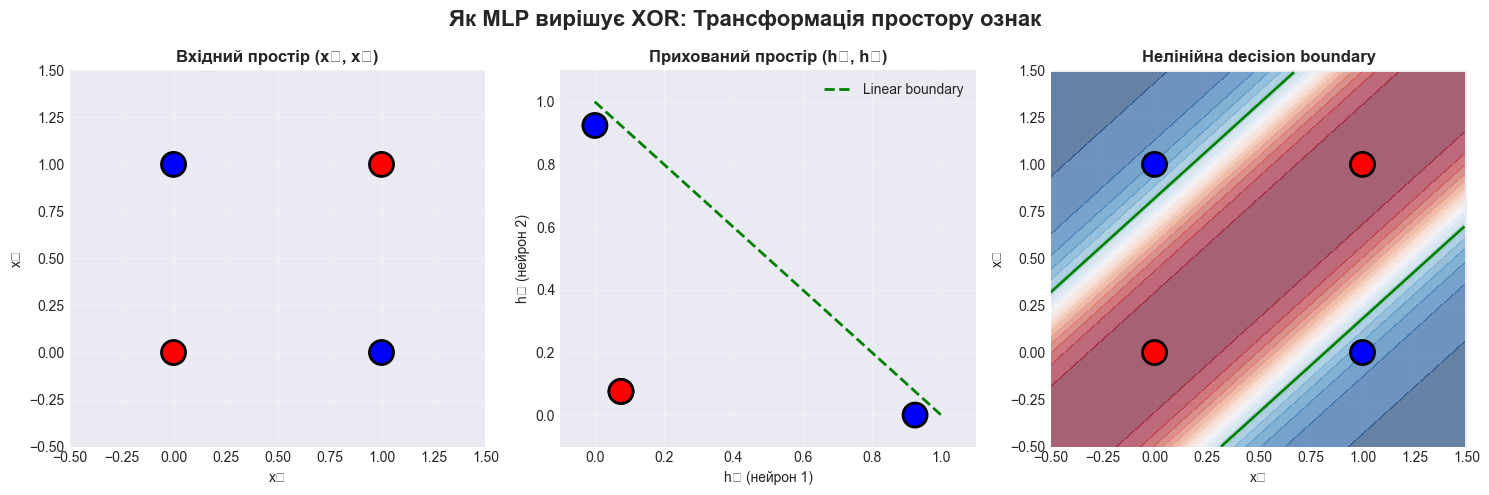

In [38]:
visualize_mlp_solution()

## 5. Функції втрат

### Mean Squared Error (MSE) - для регресії
$$L_{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i^{pred} - y_i^{true})^2$$

**Похідна:**
$$\frac{\partial L_{MSE}}{\partial y^{pred}} = \frac{2}{n}(y^{pred} - y^{true})$$

### Binary Cross-Entropy - для бінарної класифікації
$$L_{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i^{true} \log(y_i^{pred}) + (1 - y_i^{true}) \log(1 - y_i^{pred}) \right]$$

**Похідна (з sigmoid):**
$$\frac{\partial L_{BCE}}{\partial z} = \frac{1}{n}(y^{pred} - y^{true})$$

### Cross-Entropy - для мультикласової класифікації
$$L_{CE} = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{c} y_{ij}^{true} \log(y_{ij}^{pred})$$

де $c$ - кількість класів

---

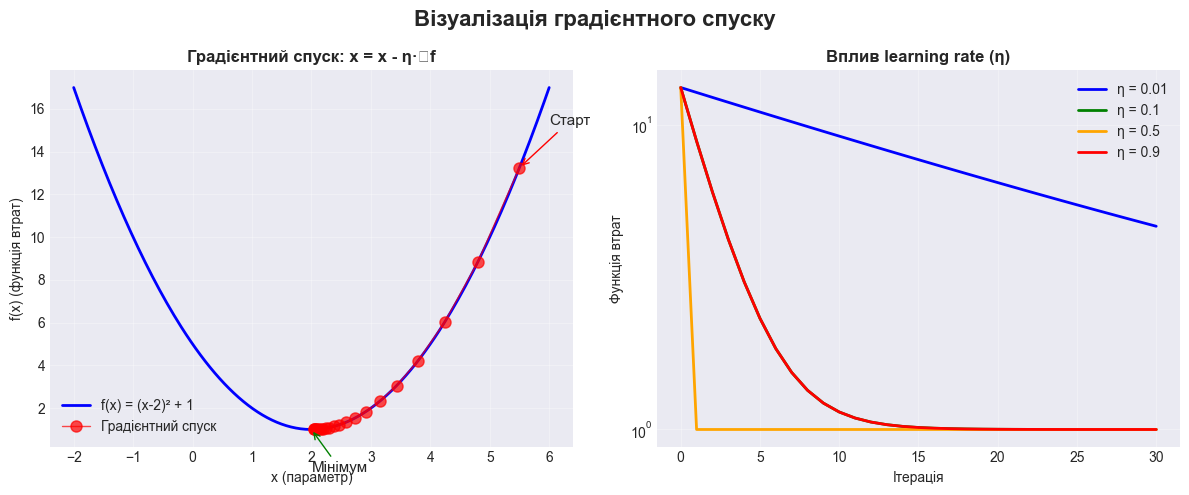

In [40]:
visualize_gradient_descent()

## 6. Градієнтний спуск

### Базове правило оновлення
$$\mathbf{w}_{t+1} = \mathbf{w}_t - \eta \cdot \nabla_{\mathbf{w}} L$$
$$b_{t+1} = b_t - \eta \cdot \frac{\partial L}{\partial b}$$

### Batch Gradient Descent
$$\nabla_{\mathbf{w}} L = \frac{1}{n} \sum_{i=1}^{n} \nabla_{\mathbf{w}} L_i$$

### Stochastic Gradient Descent (SGD)
$$\mathbf{w}_{t+1} = \mathbf{w}_t - \eta \cdot \nabla_{\mathbf{w}} L_i$$

для випадкового прикладу $i$

### Mini-batch Gradient Descent
$$\nabla_{\mathbf{w}} L = \frac{1}{|B|} \sum_{i \in B} \nabla_{\mathbf{w}} L_i$$

де $B$ - міні-батч розміру $|B|$

### SGD with Momentum
$$\mathbf{v}_{t+1} = \beta \mathbf{v}_t - \eta \nabla_{\mathbf{w}} L$$
$$\mathbf{w}_{t+1} = \mathbf{w}_t + \mathbf{v}_{t+1}$$

де $\beta$ - коефіцієнт моментуму (зазвичай 0.9)

## 7. Backpropagation (основи)

### Правило ланцюга (Chain Rule)
$$\frac{\partial L}{\partial w_{ij}^{(l)}} = \frac{\partial L}{\partial z_j^{(l)}} \cdot \frac{\partial z_j^{(l)}}{\partial w_{ij}^{(l)}}$$

### Градієнт для ваг
$$\frac{\partial L}{\partial \mathbf{W}^{(l)}} = \delta^{(l)} \cdot (\mathbf{a}^{(l-1)})^T$$

### Градієнт для bias
$$\frac{\partial L}{\partial \mathbf{b}^{(l)}} = \delta^{(l)}$$

### Похибка шару (error term)
$$\delta^{(l)} = \frac{\partial L}{\partial \mathbf{z}^{(l)}}$$

### Рекурсивне обчислення похибки
$$\delta^{(l)} = (\mathbf{W}^{(l+1)})^T \delta^{(l+1)} \odot f'(\mathbf{z}^{(l)})$$

де $\odot$ - поелементне множення (Hadamard product)

## 8. Ініціалізація ваг

### Випадкова мала
$$w_{ij} \sim \mathcal{N}(0, 0.01^2)$$

### Xavier/Glorot Initialization
$$w_{ij} \sim \mathcal{N}\left(0, \frac{2}{n_{in} + n_{out}}\right)$$

або uniform:
$$w_{ij} \sim \mathcal{U}\left[-\sqrt{\frac{6}{n_{in} + n_{out}}}, \sqrt{\frac{6}{n_{in} + n_{out}}}\right]$$

### He Initialization (для ReLU)
$$w_{ij} \sim \mathcal{N}\left(0, \frac{2}{n_{in}}\right)$$

або:
$$w_{ij} \sim \mathcal{U}\left[-\sqrt{\frac{6}{n_{in}}}, \sqrt{\frac{6}{n_{in}}}\right]$$

де:
- $n_{in}$ - кількість входів шару
- $n_{out}$ - кількість виходів шару

---

## 9. Softmax та Cross-Entropy

### Softmax (для мультикласової класифікації)
$$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{c} e^{z_j}}$$

### Стабільний Softmax (уникаємо overflow)
$$\text{softmax}(z_i) = \frac{e^{z_i - \max(\mathbf{z})}}{\sum_{j=1}^{c} e^{z_j - \max(\mathbf{z})}}$$

### Похідна Softmax + Cross-Entropy
Для комбінації softmax + cross-entropy:
$$\frac{\partial L}{\partial \mathbf{z}} = \mathbf{y}^{pred} - \mathbf{y}^{true}$$

---

## 10. Метрики оцінки

### Accuracy (Точність)
$$\text{Accuracy} = \frac{\text{Кількість правильних передбачень}}{\text{Загальна кількість прикладів}}$$

### Precision (для бінарної класифікації)
$$\text{Precision} = \frac{TP}{TP + FP}$$

### Recall (для бінарної класифікації)
$$\text{Recall} = \frac{TP}{TP + FN}$$

### F1-Score
$$\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

де:
- TP - True Positives
- FP - False Positives
- FN - False Negatives

---